In [1]:
import numpy as np

m = 100
noise = np.random.rand(m, 1)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + noise

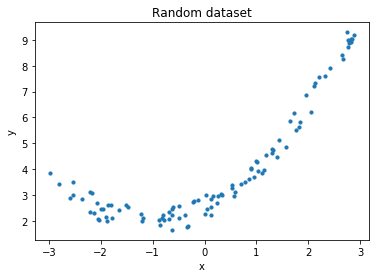

In [3]:
import matplotlib.pyplot as plt

plt.figure('Random dataset')
plt.title('Random dataset')
plt.scatter(X, y, s=10, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

poly_features.get_feature_names()

['x0', 'x0^2']

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_)
print(lin_reg.coef_)

[2.5789511]
[[0.99058207 0.46973287]]


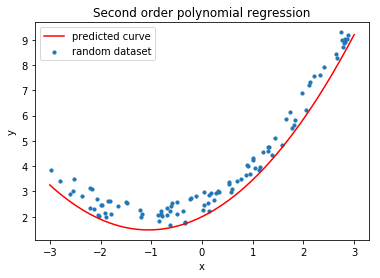

In [8]:
# Second order curve

bias = 2
c1, c2 = lin_reg.coef_[0,0], lin_reg.coef_[0,1]
x = np.linspace(-3, 3, 1000)
y_pred = c2 * (x**2) + c1 * x + bias

plt.figure('Second order polynomial regression')
plt.title('Second order polynomial regression')
plt.scatter(X, y, s=10, marker='o', label='random dataset')
plt.plot(x, y_pred, color='r', label='predicted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

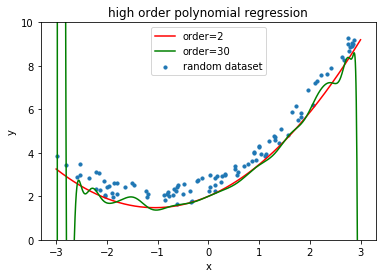

In [9]:
# Overfitted function

high_order_poly_features = PolynomialFeatures(degree=30, include_bias=False)
X_high_poly = high_order_poly_features.fit_transform(X)

high_order_lin_reg = LinearRegression()
high_order_lin_reg.fit(X_high_poly, y)

bias = np.array([2])
coef = high_order_lin_reg.coef_[0,::-1]
coef = np.concatenate((coef, bias))
x = np.linspace(-3, 3, 1000)
y_high_pred = np.poly1d(coef)(x)

plt.figure('high order polynomial regression')
plt.title('high order polynomial regression')
plt.scatter(X, y, s=10, marker='o', label='random dataset')
plt.plot(x, y_pred, color='r', label='order=2')
plt.plot(x, y_high_pred, color='g', label='order=30')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([0, 10])
plt.legend()
plt.show()